In [42]:
import numpy as np
import pandas as pd
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X 

array([[ 0.55442628],
       [ 0.2480934 ],
       [ 1.59257627],
       [ 0.80986329],
       [ 1.36973367],
       [ 0.69117178],
       [ 1.34618644],
       [ 1.73064794],
       [ 1.66195287],
       [ 1.30243078],
       [ 1.42508702],
       [ 1.40899956],
       [ 0.54467812],
       [ 0.73964488],
       [ 0.56404184],
       [ 1.27032184],
       [ 0.1137097 ],
       [ 0.28195408],
       [ 0.54773459],
       [ 1.6690426 ],
       [ 0.59940367],
       [ 1.19674093],
       [ 1.31454566],
       [ 1.86833657],
       [ 1.02263166],
       [ 1.74072516],
       [ 0.06869907],
       [ 1.8911618 ],
       [ 0.6481256 ],
       [ 0.79693119],
       [ 1.32798971],
       [ 1.284403  ],
       [ 1.19750717],
       [ 1.91376142],
       [ 0.74337399],
       [ 0.98201482],
       [ 0.1530231 ],
       [ 0.33020044],
       [ 1.47397527],
       [ 0.4265125 ],
       [ 0.09778766],
       [ 1.59693815],
       [ 0.80407691],
       [ 0.80403647],
       [ 0.01963989],
       [ 0

In [3]:
X_b=np.c_[np.ones((100,1)),X]  # add x0=1
X_b

array([[ 1.        ,  0.55442628],
       [ 1.        ,  0.2480934 ],
       [ 1.        ,  1.59257627],
       [ 1.        ,  0.80986329],
       [ 1.        ,  1.36973367],
       [ 1.        ,  0.69117178],
       [ 1.        ,  1.34618644],
       [ 1.        ,  1.73064794],
       [ 1.        ,  1.66195287],
       [ 1.        ,  1.30243078],
       [ 1.        ,  1.42508702],
       [ 1.        ,  1.40899956],
       [ 1.        ,  0.54467812],
       [ 1.        ,  0.73964488],
       [ 1.        ,  0.56404184],
       [ 1.        ,  1.27032184],
       [ 1.        ,  0.1137097 ],
       [ 1.        ,  0.28195408],
       [ 1.        ,  0.54773459],
       [ 1.        ,  1.6690426 ],
       [ 1.        ,  0.59940367],
       [ 1.        ,  1.19674093],
       [ 1.        ,  1.31454566],
       [ 1.        ,  1.86833657],
       [ 1.        ,  1.02263166],
       [ 1.        ,  1.74072516],
       [ 1.        ,  0.06869907],
       [ 1.        ,  1.8911618 ],
       [ 1.        ,

In [4]:
theata=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theata

array([[ 3.92008566],
       [ 3.16695868]])

then we can make a prediction to test 

In [5]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_new=X_new_b.dot(theata)
y_new

array([[  3.92008566],
       [ 10.25400302]])

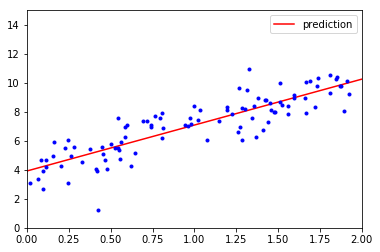

In [6]:
plt.plot(X_new,y_new,'r-',label='prediction')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.legend()
plt.show()

equivlently we can use the sklearn

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.coef_

array([[ 3.16695868]])

In [8]:
lin_reg.predict(X_new)

array([[  3.92008566],
       [ 10.25400302]])

then let us try the batch gradient descent which ** use the whole batch at every step of gradient descent**

In [9]:
learning_rate= 0.1
n_iterations=1000
m=100

theta=np.random.randn(2,1)# random initialization

for iteration in range(n_iterations):
    gradient = (2/m)*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta- learning_rate*gradient
    
theta

array([[ 3.92008566],
       [ 3.16695868]])

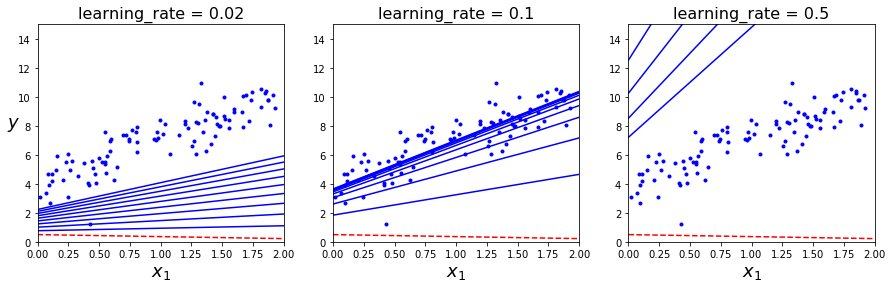

In [10]:
theta_path_bgd=[]

def plot_gradient_descent(theta, learning_rate,theta_path=None): #set theta_path 's default is None
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"learning_rate = {}".format(learning_rate), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(15,4))
plt.subplot(131); plot_gradient_descent(theta, learning_rate=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, learning_rate=0.1,theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, learning_rate=0.5)


plt.show()

In [11]:
theta_path_bgd

[array([[ 1.83899544],
        [ 1.4068807 ]]), array([[ 2.6053985 ],
        [ 2.28104313]]), array([[ 3.04459764],
        [ 2.77420385]]), array([[ 3.29783772],
        [ 3.05106247]]), array([[ 3.44534601],
        [ 3.20516176]]), array([[ 3.53269306],
        [ 3.28962912]]), array([[ 3.58576508],
        [ 3.33463697]]), array([[ 3.61926793],
        [ 3.35731994]]), array([[ 3.64155721],
        [ 3.36740754]]), array([[ 3.65738161],
        [ 3.37042343]]), array([[ 3.66944108],
        [ 3.3695025 ]]), array([[ 3.67927189],
        [ 3.36642297]]), array([[ 3.68774924],
        [ 3.36219253]]), array([[ 3.69537281],
        [ 3.35738133]]), array([[ 3.7024289 ],
        [ 3.35231106]]), array([[ 3.70908255],
        [ 3.34716235]]), array([[ 3.71542986],
        [ 3.34203577]]), array([[ 3.72152769],
        [ 3.3369865 ]]), array([[ 3.72741056],
        [ 3.33204395]]), array([[ 3.73310023],
        [ 3.32722299]]), array([[ 3.73861114],
        [ 3.32253029]]), array([[ 3.7

then let us try the stochastic gradient descent 

In [12]:
n_epochs=50
t0,t1 = 5,50 #learning schedule 

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

In [13]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        X_i=X_b[random_index:random_index+1]
        y_i=y[random_index:random_index+1]
        gradients=2*X_i.T.dot(X_i.dot(theta)-y_i)
        learning_rate=learning_schedule(epoch*m+i)
        theta=theta-learning_rate*gradient
        
        
theta
        

array([[ 0.64768854],
       [ 1.52302986]])

let us plot first 10 steps 

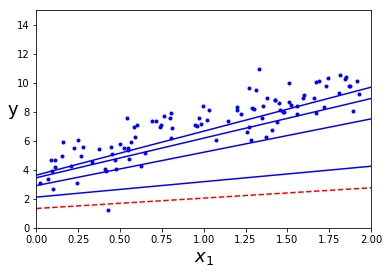

In [14]:
m = len(X_b)
n_epochs=50
t0,t1 = 5,50 #learning schedule 
theta_path_sgd=[]
np.random.seed(10)
theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch==0 and i < 5:
            y_predict=X_new_b.dot(theta)
            style='b-' if i > 0 else 'r--'
            plt.plot(X_new,y_predict,style)
        random_index=np.random.randint(m)
        X_i=X_b[random_index:random_index+1]
        y_i=y[random_index:random_index+1]
        gradients=2*X_i.T.dot(X_i.dot(theta)-y_i)
        learning_rate = learning_schedule(epoch*m+ i)
        theta = theta - learning_rate*gradients
        theta_path_sgd.append(theta)
    
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y",rotation=0,fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()



In [15]:
theta_path_sgd

[array([[ 2.11597189],
        [ 1.06499853]]), array([[ 2.90940541],
        [ 2.30160712]]), array([[ 3.45108548],
        [ 2.73328886]]), array([[ 3.63150977],
        [ 3.03314552]]), array([[ 3.6829716 ],
        [ 3.06015136]]), array([[ 3.56366585],
        [ 2.99400512]]), array([[ 3.34876556],
        [ 2.97299052]]), array([[ 3.55231028],
        [ 3.00413757]]), array([[ 3.68170171],
        [ 3.01885063]]), array([[ 3.47539949],
        [ 2.72817089]]), array([[ 3.64396296],
        [ 2.88776483]]), array([[ 3.44913327],
        [ 2.76616044]]), array([[ 3.48401382],
        [ 2.7694662 ]]), array([[ 3.69195088],
        [ 3.16740813]]), array([[ 3.71868958],
        [ 3.2175361 ]]), array([[ 3.83631437],
        [ 3.33175356]]), array([[ 3.8285991 ],
        [ 3.32055034]]), array([[ 3.6163338 ],
        [ 2.96637476]]), array([[ 3.71117466],
        [ 3.05616899]]), array([[ 3.62312513],
        [ 2.90492147]]), array([[ 3.68085184],
        [ 2.99272287]]), array([[ 3.8

if you want to make sure that every instance go through at each epoch, you have to shuffle instance ,than go through it instance by instance than shuffle again

let try sklearn

In [16]:
y.ravel()

array([  4.72341832,   6.09070101,   8.92064367,   6.86958433,
         6.28121833,   7.35622309,   7.54146957,   9.80134508,
         8.94993147,   8.1894417 ,   8.7898068 ,   6.71807781,
         7.54252492,   6.9381258 ,   5.92819979,   6.94861971,
         4.64438012,   5.60422971,   5.33258493,  10.05424486,
         7.0673547 ,   8.10162746,   9.50360018,   9.81571301,
         7.4553314 ,  10.32250901,   3.35566678,   8.04936515,
         5.14672978,   7.56036427,  10.97120942,   6.03719284,
         8.35459447,  10.0941149 ,   7.09173026,   7.18893674,
         4.9639067 ,   4.52844743,   7.99154221,   1.1965172 ,
         2.65300094,   9.18134818,   7.91357383,   6.16515779,
         3.11148054,   3.93433639,   8.27742448,   9.24827392,
         8.40735054,   8.62337821,   8.1104672 ,   7.94693085,
         8.41920443,   4.94607086,   7.06978096,   4.08115023,
         4.65551211,  10.25756019,   8.42427254,   4.02771532,
         6.23954793,   7.34309631,   3.92755144,   7.35

In [17]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(n_iter=5,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel()) 
#A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

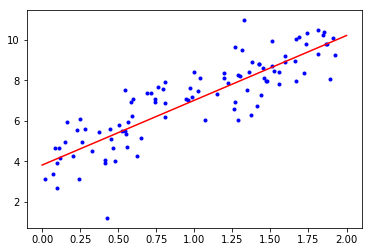

In [18]:
X_new=np.array([[0],[2]])
y_pred=sgd_reg.predict(X_new)

plt.plot(X,y,'b.')
plt.plot(X_new,y_pred,'r-')

## Mini-batch Gradient Descent

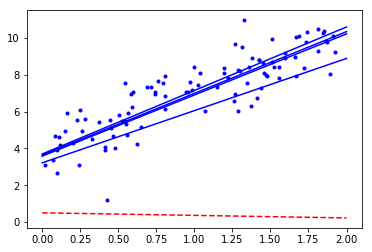

In [19]:
n_epoch=50
minibatch_size=20
m=len(X_b)
theta_path_mgd=[]
t0,t1=10,1000
t=0
np.random.seed(42)
theta=np.random.randn(2,1)

for epoch in range(n_epoch):
    shuffle_indice=np.random.permutation(m)
    X_b_shuffled=X_b[shuffle_indice]
    y_shufffled=y[shuffle_indice]
    for i in range(0,m,minibatch_size):
        if epoch==0 and i< m:
            y_pred=X_new_b.dot(theta)
            scale="b-" if i > 0 else "r--"
            plt.plot(X_new , y_pred, scale)
        t+=1
        X_i=X_b[i:i+minibatch_size]
        y_i=y[i:i+minibatch_size]
        gradients=2* X_i.T.dot(X_i.dot(theta)-y_i)
        learning_rate=learning_schedule(t)
        theta=theta-learning_rate*gradients
        theta_path_mgd.append(theta)

plt.plot(X,y,'b.')
plt.show()

then we plot 3 batch gradient descent and compare

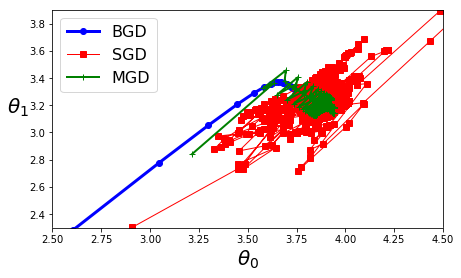

In [20]:
theta_path_bgd=np.array(theta_path_bgd)
theta_path_sgd=np.array(theta_path_sgd)
theta_path_mgd=np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],"b-o",linewidth=3,label="BGD")
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],"r-s",linewidth=1,label="SGD")
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],"g-+",linewidth=2,label="MGD")

plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

## Polynominals Regression

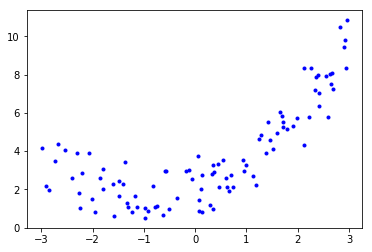

In [21]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X,y,'b.')
plt.show()

use sklearn PolynomialFeatures to transfer our feature in to polynominal

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([ 2.38942838])

In [23]:
X_poly[0]

array([ 2.38942838,  5.709368  ])

In [24]:
lin_reg.fit(X_poly,y)
lin_reg.coef_

array([[ 0.95038538,  0.52577032]])

In [25]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new

array([[-3.        ],
       [-2.93939394],
       [-2.87878788],
       [-2.81818182],
       [-2.75757576],
       [-2.6969697 ],
       [-2.63636364],
       [-2.57575758],
       [-2.51515152],
       [-2.45454545],
       [-2.39393939],
       [-2.33333333],
       [-2.27272727],
       [-2.21212121],
       [-2.15151515],
       [-2.09090909],
       [-2.03030303],
       [-1.96969697],
       [-1.90909091],
       [-1.84848485],
       [-1.78787879],
       [-1.72727273],
       [-1.66666667],
       [-1.60606061],
       [-1.54545455],
       [-1.48484848],
       [-1.42424242],
       [-1.36363636],
       [-1.3030303 ],
       [-1.24242424],
       [-1.18181818],
       [-1.12121212],
       [-1.06060606],
       [-1.        ],
       [-0.93939394],
       [-0.87878788],
       [-0.81818182],
       [-0.75757576],
       [-0.6969697 ],
       [-0.63636364],
       [-0.57575758],
       [-0.51515152],
       [-0.45454545],
       [-0.39393939],
       [-0.33333333],
       [-0

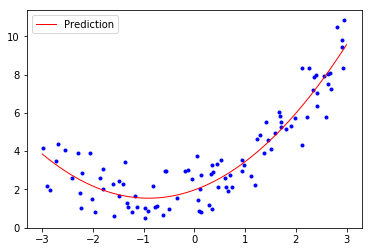

In [26]:
X_new_poly=poly_features.fit_transform(X_new)
y_pred=lin_reg.predict(X_new_poly)

plt.plot(X,y,'b.')
plt.plot(X_new,y_pred,'r-',linewidth=1,label='Prediction')
plt.legend()
plt.show()

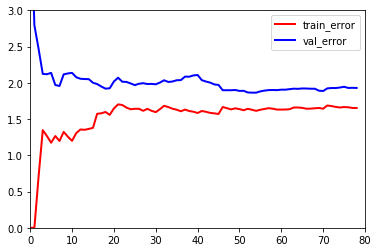

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_error,val_error=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_pred=model.predict(X_train[:m])
        y_val_pred=model.predict(X_val)
        train_error.append(mean_squared_error(y_train_pred,y_train[:m]))
        val_error.append(mean_squared_error(y_val_pred,y_val))
    plt.plot(np.sqrt(train_error),"r-",linewidth=2,label="train_error")
    plt.plot(np.sqrt(val_error),"b-",linewidth=2,label="val_error")
    plt.legend()
    plt.axis([0,80,0,3])
    plt.show()
    
plot_learning_curve(lin_reg,X,y)
        


the train error start at 0 because there are only one sample can easily fit; the val error start at high because only one error is fitted , it is underfitting problem

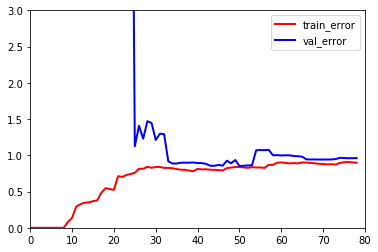

In [28]:
from sklearn.pipeline import Pipeline
polynominal_regression=Pipeline([("poly_features", PolynomialFeatures(degree=8, include_bias=False)),
                                 ("lin_reg",LinearRegression())])
plot_learning_curve(polynominal_regression,X,y)

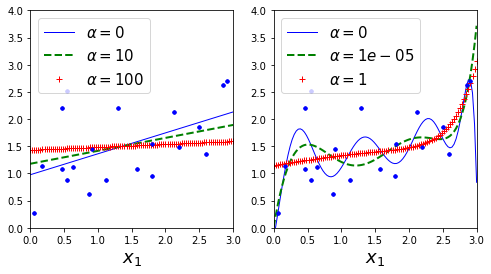

In [29]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class,polynominal,alphas,**model_kargs):
    for alpha, style in zip(alphas, ('b-','g--','r+')):
        model=model_class(alpha,**model_kargs) if alpha >0 else LinearRegression()
        if polynominal:
            model=Pipeline([("poly_feature",PolynomialFeatures(degree=10, include_bias=False)),
                                   ("scale",StandardScaler()),
                                   ("regression",model)])
        model.fit(X,y)
        y_pred=model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new,y_pred,style,linewidth=lw,label=r"$\alpha={}$".format(alpha))
        plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])
    
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge,polynominal=False,alphas=(0,10,100),random_state=41)
plt.subplot(122)
plot_model(Ridge,polynominal=True,alphas=(0,10**-5,1),random_state=41)
plt.show()

and there are two ways to implement regularization

In [30]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[ 1.55071465]])

or

In [31]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([ 1.12795912])

so as Lasso,or L1

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


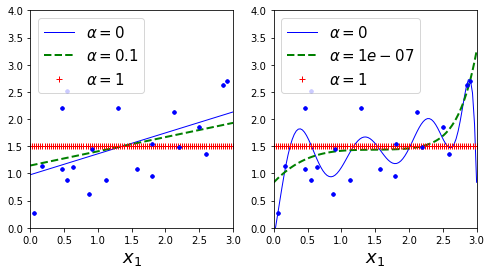

In [32]:
from sklearn.linear_model import Lasso
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso,polynominal=False,alphas=(0,0.1,1),random_state=41)
plt.subplot(122)
plot_model(Lasso,polynominal=True,alphas=(0,10**-7,1),random_state=41)
plt.show()

## Early Stop

In [33]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train,X_val,y_train,y_val=train_test_split(X[:50],y[:50].ravel(),test_size=0.5,random_state=10)
X_train.shape

(25, 1)

(500,)
239


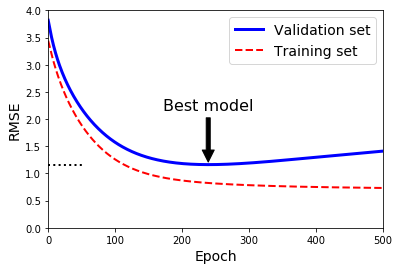

In [34]:
poly_scaler=Pipeline([("poly_features",PolynomialFeatures(degree=90, include_bias=False)),
                     ("std_scaler",StandardScaler())])

X_train_scaled=poly_scaler.fit_transform(X_train)
X_val_scaled=poly_scaler.transform(X_val)

sgd_reg=SGDRegressor(n_iter=1,penalty=None,eta0=0.0005,
                     warm_start=True,learning_rate="constant",random_state=42)
n_epoch=500
train_errors, val_errors = [], []

for epoch in range(n_epoch):
    sgd_reg.fit(X_train_scaled,y_train)
    y_train_pred=sgd_reg.predict(X_train_scaled)
    y_val_pred=sgd_reg.predict(X_val_scaled)
    train_errors.append(mean_squared_error(y_train_pred, y_train))
    val_errors.append(mean_squared_error(y_val_pred,y_val))


train_errors=np.array(train_errors)
print(train_errors.shape)
val_errors=np.array(val_errors)
best_epoch=np.argmin(val_errors)
print(best_epoch)
best_val_rmse=np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse +1),
             ha="center",arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16)

plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.axis([0,500,0,4])
plt.show()

## Logistical regression

Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal
width feature

In [35]:
from sklearn import datasets
iris=datasets.load_iris()
list(iris)

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [36]:
X=iris["data"][:,3:]
y=(iris["target"]==2).astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

[ 1.61561562]


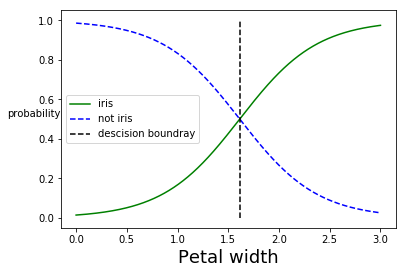

In [38]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_pred=log_reg.predict_proba(X_new) #predicted probability of different labels
descision_boundray=X_new[y_pred[:,1]>=0.5][0] #y_pred[:,1]>=0.5 give the boundray
print(descision_boundray)
plt.plot(X_new, y_pred[:,1],"g-",label="iris")
plt.plot(X_new, y_pred[:,0],"b--",label="not iris")
plt.plot([descision_boundray , descision_boundray],[0 ,1],"k--",label="descision boundray")
plt.legend()
plt.xlabel("Petal width", fontsize=18)
plt.ylabel("probability", rotation=0,fontsize=10)
plt.show()

what if we consider two features, petal width and length

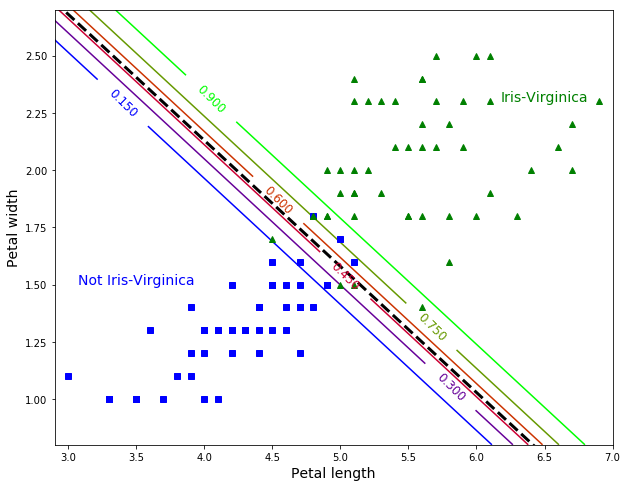

(array([-45.26062435]), array([[  5.7528683 ,  10.44455633]]))

In [69]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new=np.c_[x0.ravel(),x1.ravel()]

y_proba=log_reg.predict_proba(X_new)

plt.figure(figsize=(10,8))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

log_reg.intercept_, log_reg.coef_
#shape of intercept_ : [n_classes]
#shape of coef_ : [n_features, n_classes]

## Softmax regression

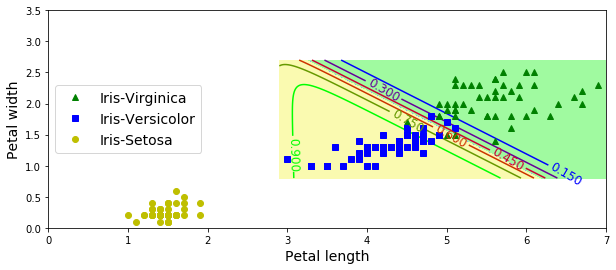

In [103]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new=np.c_[x0.ravel(),x1.ravel()]
y_proba=softmax_reg.predict_proba(X_new)
y_predict=softmax_reg.predict(X_new)

plt.figure(figsize=(10,4))
plt.plot(X[y==2,0], X[y==2,1], "g^", label="Iris-Virginica") #y=2,0 means y=2 and take 0 column from y
plt.plot(X[y==1,0], X[y==1,1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0,0], X[y==0,1], "yo", label="Iris-Setosa")
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

zz1=y_proba[:,1].reshape(x0.shape)
zz=y_predict.reshape(x0.shape)

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [89]:
y=iris["target"]
X

array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.7,  0.4],
       [ 1.4,  0.3],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.5,  0.1],
       [ 1.5,  0.2],
       [ 1.6,  0.2],
       [ 1.4,  0.1],
       [ 1.1,  0.1],
       [ 1.2,  0.2],
       [ 1.5,  0.4],
       [ 1.3,  0.4],
       [ 1.4,  0.3],
       [ 1.7,  0.3],
       [ 1.5,  0.3],
       [ 1.7,  0.2],
       [ 1.5,  0.4],
       [ 1. ,  0.2],
       [ 1.7,  0.5],
       [ 1.9,  0.2],
       [ 1.6,  0.2],
       [ 1.6,  0.4],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.6,  0.2],
       [ 1.6,  0.2],
       [ 1.5,  0.4],
       [ 1.5,  0.1],
       [ 1.4,  0.2],
       [ 1.5,  0.1],
       [ 1.2,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.1],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.3,  0.3],
       [ 1.3,  0.3],
       [ 1.3,  0.2],
       [ 1.6,  0.6],
       [ 1.9,  0.4],
       [ 1.4,  0.3],
       [ 1.6,  0.2],
       [ 1.4,